In [26]:
import sys
import os

from config_build import *

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from docx import Document
from io import BytesIO


In [27]:

# 读取配置文件
config_df = pd.read_excel(r'/Users/harvin/code/自动报告产品开发-产业链@20220830/data/pmi_config.xlsx',header=0, sheet_name='指标数据')

# 显示数据或进行其他操作
# print(config_df.head())  # 显示前几行数据

# 选择行业编码为 'C'（制造业）的行
manufacturing_data = config_df[(config_df['产业名称'] == '制造业采购经理指数') & (config_df['指标名称'] == 'PMI指数_当期值')]

#PMI指数_当期值

# 显示制造业的数据或进行其他操作


In [28]:
print(manufacturing_data)  # 显示前几行数据

                指标编码       指标名称    地区编码 行业编码   产业编码       产业名称   报告期编码   数据值  \
168109  BJ_203700102  PMI指数_当期值  000000  NaN  X0201  制造业采购经理指数  200501  54.7   
168110  BJ_203700102  PMI指数_当期值  000000  NaN  X0201  制造业采购经理指数  200502  54.5   
168111  BJ_203700102  PMI指数_当期值  000000  NaN  X0201  制造业采购经理指数  200503  57.9   
168112  BJ_203700102  PMI指数_当期值  000000  NaN  X0201  制造业采购经理指数  200504  56.7   
168113  BJ_203700102  PMI指数_当期值  000000  NaN  X0201  制造业采购经理指数  200505  52.9   
...              ...        ...     ...  ...    ...        ...     ...   ...   
171117  BJ_203700102  PMI指数_当期值  110000  NaN  X0201  制造业采购经理指数  202305  50.7   
171118  BJ_203700102  PMI指数_当期值  110000  NaN  X0201  制造业采购经理指数  202306  50.0   
171119  BJ_203700102  PMI指数_当期值  110000  NaN  X0201  制造业采购经理指数  202307  50.0   
171120  BJ_203700102  PMI指数_当期值  110000  NaN  X0201  制造业采购经理指数  202308  48.6   
171121  BJ_203700102  PMI指数_当期值  110000  NaN  X0201  制造业采购经理指数  202309  50.2   

       计量单位名称   创建人 删除标记  
168109      

/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_21426/249144754.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manufacturing_data['报告期编码'] = pd.to_datetime(manufacturing_data['报告期编码'], format='%Y%m', errors='coerce')


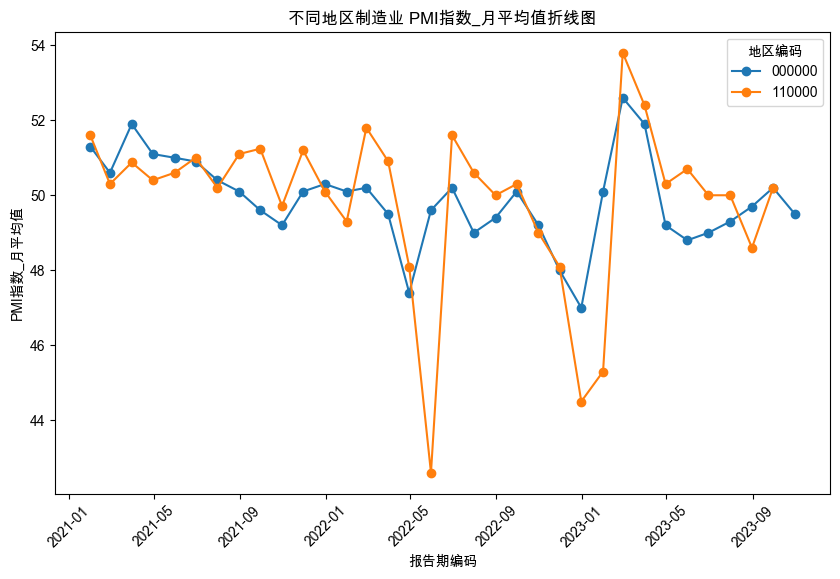

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.dates import DateFormatter, MonthLocator  # Add this line
from docx import Document
from io import BytesIO

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 设置中文字体为系统自带的中文字体，如 macOS 的 Arial Unicode MS

# 读取配置文件
config_df = pd.read_excel(r'/Users/harvin/code/自动报告产品开发-产业链@20220830/data/pmi_config.xlsx', header=0, sheet_name='指标数据')

# 选择行业编码为 'C'（制造业）且指标名称为 'PMI指数_当期值' 的行
manufacturing_data = config_df[(config_df['产业名称'] == '制造业采购经理指数') & (config_df['指标名称'] == 'PMI指数_当期值')]

# 筛选出 2021 年及之后的数据
manufacturing_data['报告期编码'] = pd.to_datetime(manufacturing_data['报告期编码'], format='%Y%m', errors='coerce')
manufacturing_data = manufacturing_data[manufacturing_data['报告期编码'].dt.year >= 2021]

# 将报告期编码转换为日期格式，跳过无法转换的值并输出异常信息
errors = []
try:
    manufacturing_data['报告期编码'] = pd.to_datetime(manufacturing_data['报告期编码'], format='%Y%m', errors='coerce')
except Exception as e:
    errors.append(str(e))

# 去除无法转换为日期的行
manufacturing_data.dropna(subset=['报告期编码'], inplace=True)

# 转换数据值列为数值型，跳过无法转换的值
manufacturing_data['数据值'] = pd.to_numeric(manufacturing_data['数据值'], errors='coerce')

# 去除非数值型数据行
manufacturing_data.dropna(subset=['数据值'], inplace=True)

# 按地区编码和月份进行数据分组，计算每个月的平均值
grouped_data = manufacturing_data.groupby(['地区编码', pd.Grouper(key='报告期编码', freq='M')])['数据值'].mean().reset_index()

# 创建图表
plt.figure(figsize=(10, 6))  # 设置图形大小

# 遍历分组数据并画折线图
for region_code, group_data in grouped_data.groupby('地区编码'):
    plt.plot(group_data['报告期编码'], group_data['数据值'], label=region_code, marker='o', linestyle='-')

# 设置图例、标题和坐标轴标签（使用中文）
plt.legend(title='地区编码')  # 添加图例
plt.title('不同地区制造业 PMI指数_月平均值折线图')  # 设置标题
plt.xlabel('报告期编码')  # 设置 x 轴标签
plt.ylabel('PMI指数_月平均值')  # 设置 y 轴标签
plt.xticks(rotation=45)  # 设置 x 轴刻度角度

# 输出无法转换的异常信息
if errors:
    print("无法转换为日期的值列表：")
    for error in errors:
        print(error)

# 保存图表到 BytesIO 对象
image_stream = BytesIO()
plt.savefig(image_stream, format='png')
image_stream.seek(0)

# 创建 Word 文档
doc = Document()
doc.add_paragraph("制造业 PMI指数_月平均值折线图")

# 将图表保存到 Word 文档中
doc.add_picture(image_stream)

# 保存 Word 文档
doc.save('PMI月均值折线图.docx')


/var/folders/4m/3yfnhmtx0vx1d01xd38_4r5r0000gn/T/ipykernel_21426/447800383.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manufacturing_data['报告期编码'] = pd.to_datetime(manufacturing_data['报告期编码'], format='%Y%m', errors='coerce')


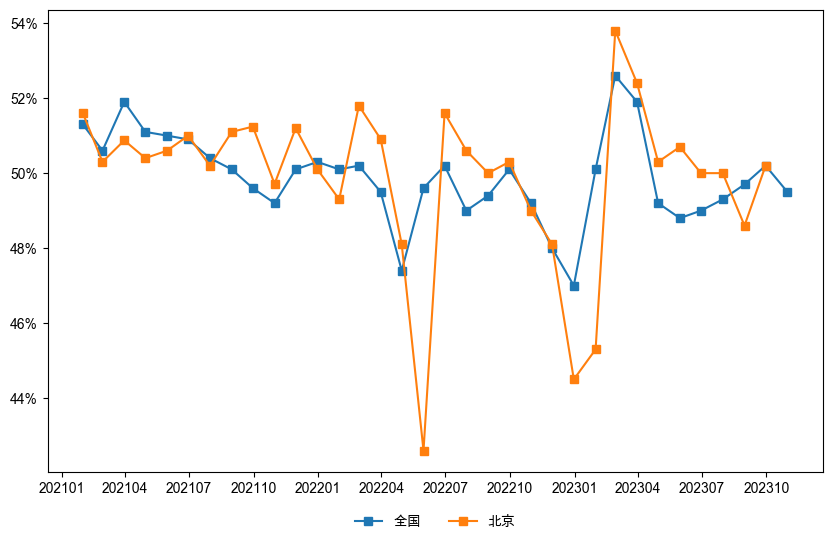

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.dates import DateFormatter, MonthLocator  # Add this line
from matplotlib.ticker import FuncFormatter # 用于改y轴格式
from docx import Document
from io import BytesIO

# 读取配置文件
config_df = pd.read_excel(r'/Users/harvin/code/自动报告产品开发-产业链@20220830/data/pmi_config.xlsx', header=0, sheet_name='指标数据')

# 选择行业编码为 'C'（制造业）且指标名称为 'PMI指数_当期值' 的行
manufacturing_data = config_df[(config_df['产业名称'] == '制造业采购经理指数') & (config_df['指标名称'] == 'PMI指数_当期值')]

# 筛选出 2021 年及之后的数据
manufacturing_data['报告期编码'] = pd.to_datetime(manufacturing_data['报告期编码'], format='%Y%m', errors='coerce')
manufacturing_data = manufacturing_data[manufacturing_data['报告期编码'].dt.year >= 2021]

# 去除非日期值的行
manufacturing_data.dropna(subset=['报告期编码'], inplace=True)

# 转换数据值列为数值型，跳过无法转换的值
manufacturing_data['数据值'] = pd.to_numeric(manufacturing_data['数据值'], errors='coerce')

# 去除非数值型数据行
manufacturing_data.dropna(subset=['数据值'], inplace=True)

# 筛选出全国和北京的数据
national_data = manufacturing_data[manufacturing_data['地区编码'] == '000000']
beijing_data = manufacturing_data[manufacturing_data['地区编码'] == '110000']

# 按地区编码和月份进行数据分组，计算每个月的平均值
grouped_national = national_data.groupby(pd.Grouper(key='报告期编码', freq='1M'))['数据值'].mean().reset_index()
grouped_beijing = beijing_data.groupby(pd.Grouper(key='报告期编码', freq='1M'))['数据值'].mean().reset_index()

# 创建图表
plt.figure(figsize=(10, 6))  # 设置图形大小

# 绘制全国数据，使用方形标记点
plt.plot(grouped_national['报告期编码'], grouped_national['数据值'], label='全国', marker='s', linestyle='-')

# 绘制北京数据，使用方形标记点
plt.plot(grouped_beijing['报告期编码'], grouped_beijing['数据值'], label='北京', marker='s', linestyle='-')

# 设置图例、标题和坐标轴标签（使用中文）
plt.legend(loc='lower center', ncol=2, frameon=False,bbox_to_anchor=(0.5, -0.15),)  # 添加图例，放在图的下方
# plt.title('全国和北京制造业 PMI指数月平均值折线图')  # 设置标题
# plt.xlabel('报告期编码')  # 设置 x 轴标签
# plt.ylabel('PMI指数_月平均值')  # 设置 y 轴标签
# plt.xticks(rotation=45)  # 设置 x 轴刻度角度

# 设置 Y 轴标签格式为百分比
def y_fmt(y, pos):
    return f'{y:.0f}%'

plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))

# 获取 x 轴的最小和最大日期
x_min = min(min(grouped_national['报告期编码']), min(grouped_beijing['报告期编码']))
x_max = max(max(grouped_national['报告期编码']), max(grouped_beijing['报告期编码']))


# 获取 x 轴的刻度
x_ticks = pd.date_range(start=x_min, end=x_max, freq='M').strftime('%Y-%m').tolist()
x_ticks = [tick for tick in x_ticks if tick[-2:] in ['01', '04', '07', '10']]  # 保留 1、3、7、10 月份的刻度


# 设置 X 轴的刻度和标签
plt.xticks(x_ticks)
# 设置 X 轴的刻度为月份，间隔为3个月
# plt.gca().xaxis.set_major_locator(MonthLocator(bymonthday=1, interval=3))
date_format = DateFormatter("%Y%m")  # 设置日期格式为年月
plt.gca().xaxis.set_major_formatter(date_format)
# 保存图表到 BytesIO 对象
image_stream = BytesIO()
plt.savefig(image_stream, format='png')
image_stream.seek(0)

# 创建 Word 文档
doc = Document()
doc.add_paragraph("制造业 PMI指数_月平均值折线图")

# 将图表保存到 Word 文档中
doc.add_picture(image_stream)

# 保存 Word 文档
doc.save('PMI月均值折线图.docx')

# 合并全国和北京的数据
merged_data = pd.concat([grouped_national, grouped_beijing['数据值']], axis=1)
merged_data.columns = ['报告期编码', '全国', '北京']

# 保存合并后的数据为一个 CSV 文件，并指定编码为 UTF-8
merged_data.to_csv('national_and_beijing_data.csv', index=False, encoding='utf-8-sig')


